# PF Generators (Equidistant points, Risez Energy Method)

## Notebook for generating different Pareto-optimal data points for visualization

This notebook can be used to generate different Pareto-optimal data points for visualiation. The points generated in this notebook are computed from the subproblem decomposition weights used in Normal Boundary Intersection (NBI) method [[1]](#1). Currently this notebook implements following Pareto-optimal front (i.e. surface or point-clouds) through the `generators` module.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)

<a id="1">[1]</a> 
I. Das and J. E. Dennis, "Normal-Boundary Intersection: A New Method for Generating the Pareto Surface in Nonlinear Multicriteria Optimization Problems," SIAM Journal on Optimization, vol. 8, (3), pp. 631-27, 1998. [[pdf]](https://pdfs.semanticscholar.org/bd2d/4ce70e89e338bf06d5eac25dd366aae76225.pdf)

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

sys.path.append('../')
from vis.utils import transform as tr

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate Pareto-optimal front for DEBMDK

../data/debmdk-rz/2d dataf.csv datax.csv debmdk-rz
F.shape: (1000, 2)
X.shape: (1000, 1)
F.shape: (591, 2)
X.shape: (591, 1)
[[9.5 0. ]
 [9.5 0. ]
 [9.5 0. ]]
[[1.]
 [1.]
 [1.]]


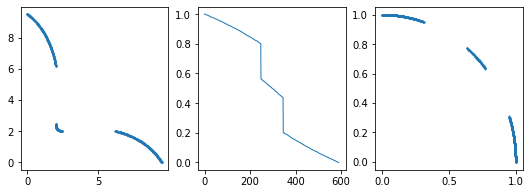

../data/debmdk-rz/3d dataf.csv datax.csv debmdk-rz
F.shape: (1500, 3)
X.shape: (1500, 2)
F.shape: (1154, 3)
X.shape: (1154, 2)
[[9.5        0.         0.        ]
 [9.43520078 0.18050479 0.        ]
 [9.36027654 0.36382984 0.        ]]
[[1.         1.        ]
 [1.         0.98782231]
 [1.         0.97526732]]


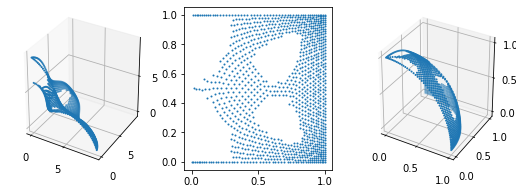

../data/debmdk-rz/4d dataf.csv datax.csv debmdk-rz
F.shape: (2500, 4)
X.shape: (2500, 3)
F.shape: (2178, 4)
X.shape: (2178, 3)
[[9.5        0.         0.         0.        ]
 [9.37733629 0.45317404 0.         0.        ]
 [9.20422647 0.91920594 0.         0.        ]]
[[1.         1.         1.        ]
 [1.         1.         0.9692583 ]
 [1.         1.         0.93663229]]


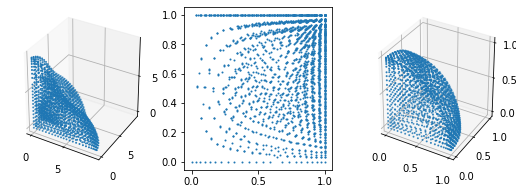

../data/debmdk-rz/8d dataf.csv datax.csv debmdk-rz


In [ ]:
from vis.generators import debmdk

dims = {"2d": 1000, "3d": 1500, '4d': 2500, '8d': 4100}

for dim in dims:
    # Open all files
    fullpathf = "../data/debmdk-rz/{0:s}/dataf.csv".format(dim)
    path, filenamef = os.path.split(fullpathf)
    dirs = path.split('/')
    frontname = dirs[-2]
    os.makedirs(path, exist_ok=True)
    filenamex = filenamef.split('.')[0][0:-1] + 'x.csv'
    fullpathx = os.path.join(path, filenamex)
    print(path, filenamef, filenamex, frontname)

    np.random.seed(123456)
    r, n, m = 1, dims[dim], int(dim[0])
    F, X = debmdk.surface(r=r, n=n, m=m, mode='rz') # uniform
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)
    
    Ip = tr.pfindices(F)
    F = F[Ip]
    X = X[Ip]
    print("F.shape:", F.shape)
    print("X.shape:", X.shape)

    print(F[0:3,:])
    print(X[0:3,:])
    
    # Just to make sure if we can get correct F from X
    F_ = np.zeros(F.shape)
    for i in range(m):
        if i < m-1:
            F_[:,i] = np.prod(np.sin(X[:,0:i] * (np.pi / 2)), axis=1) \
                    * np.cos(X[:,i] * (np.pi / 2))
        else:
            F_[:,i] = np.prod(np.sin(X[:,0:i-1] * (np.pi / 2)), axis=1) \
                    * np.sin(X[:,i-1] * (np.pi / 2))
    F_ = F_[:,::-1]
    F_ = r * F_

    # Plot
    if dim == "2d":
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(F[:,0], F[:,1], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(X[:,0], lw=1.0)
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(F_[:,0], F_[:,1], s=1)
        plt.show()
    else:
        fig = plt.figure(figsize=(9, 3))
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(F[:,0], F[:,1], F[:,2], s=1)
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(X[:,0], X[:,1], s=1)
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(F_[:,0], F_[:,1], F_[:,2], s=1)
        plt.show()

    np.savetxt(fullpathf, F, delimiter=',', fmt="%1.4e")
    np.savetxt(fullpathx, X, delimiter=',', fmt="%1.4e")